In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6


In [6]:
import zipfile
from mpl_toolkits.basemap import Basemap
#%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/zomato-india-data-set.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
import os
cwd=os.getcwd()
os.chdir("/tmp")
cwd=os.getcwd()


import glob
dirs=glob.glob(cwd+"/*/")

import pandas as pd
lis=[]
df=None
for files in dirs:
  file=glob.glob(files+"/*.csv")
  for dataset in file:
    df=pd.read_csv(dataset,quotechar='"',delimiter='|')
    lis.append(df.values)

In [0]:
import numpy as np
df1=np.vstack(lis)
df1=pd.DataFrame(df1,columns=df.columns)
df=df1.drop(columns=['PAGE NO'])
city=df["CITY"].unique()



In [10]:

from  geopy.geocoders import Nominatim


longlis=[]
for i in range(0,30):
  city_name=city[i]
  country="India"
  geolocator = Nominatim()
  loc=geolocator.geocode(city_name+','+ country)
  lat=loc.latitude
  lon=loc.longitude
  dataframe=pd.DataFrame([[city[i],lat,lon]])
  longlis.append(dataframe.values)


/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [11]:
for i in range(30,60):
  city_name=city[i]
  country="India"
  geolocator = Nominatim()
  loc=geolocator.geocode(city_name+','+ country)
  lat=loc.latitude
  lon=loc.longitude
  dataframe=pd.DataFrame([[city[i],lat,lon]])
  longlis.append(dataframe.values)

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [12]:
for i in range(60,len(city)):
  city_name=city[i]
  country="India"
  geolocator = Nominatim()
  loc=geolocator.geocode(city_name+','+ country)
  lat=loc.latitude
  lon=loc.longitude
  dataframe=pd.DataFrame([[city[i],lat,lon]])
  longlis.append(dataframe.values)

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [13]:
len(longlis)

81

In [14]:
longlis[45],city[45]

(array([['Palakkad', 10.7691989, 76.6512469]], dtype=object), 'Palakkad')

In [0]:
import requests



df_cor=np.vstack(longlis)
df_cor=pd.DataFrame(df_cor,columns=['CITY','LAT','LONG'])

df_count=df["CITY"].value_counts().sort_values(ascending=True)
dic={}
for i,j in df_count.items():
  dic.update({i:[i,j]})

newdf=pd.DataFrame.from_dict(dic,orient="index",columns=["CITY","COUNTS"])
plotdf=newdf.merge(df_cor,on="CITY",how="left")

In [0]:
topdf=plotdf.tail(20)
lng=np.array(topdf["LONG"])
lat=np.array(topdf["LAT"])
city=np.array(topdf["CITY"])
citycount=np.array(topdf["COUNTS"])

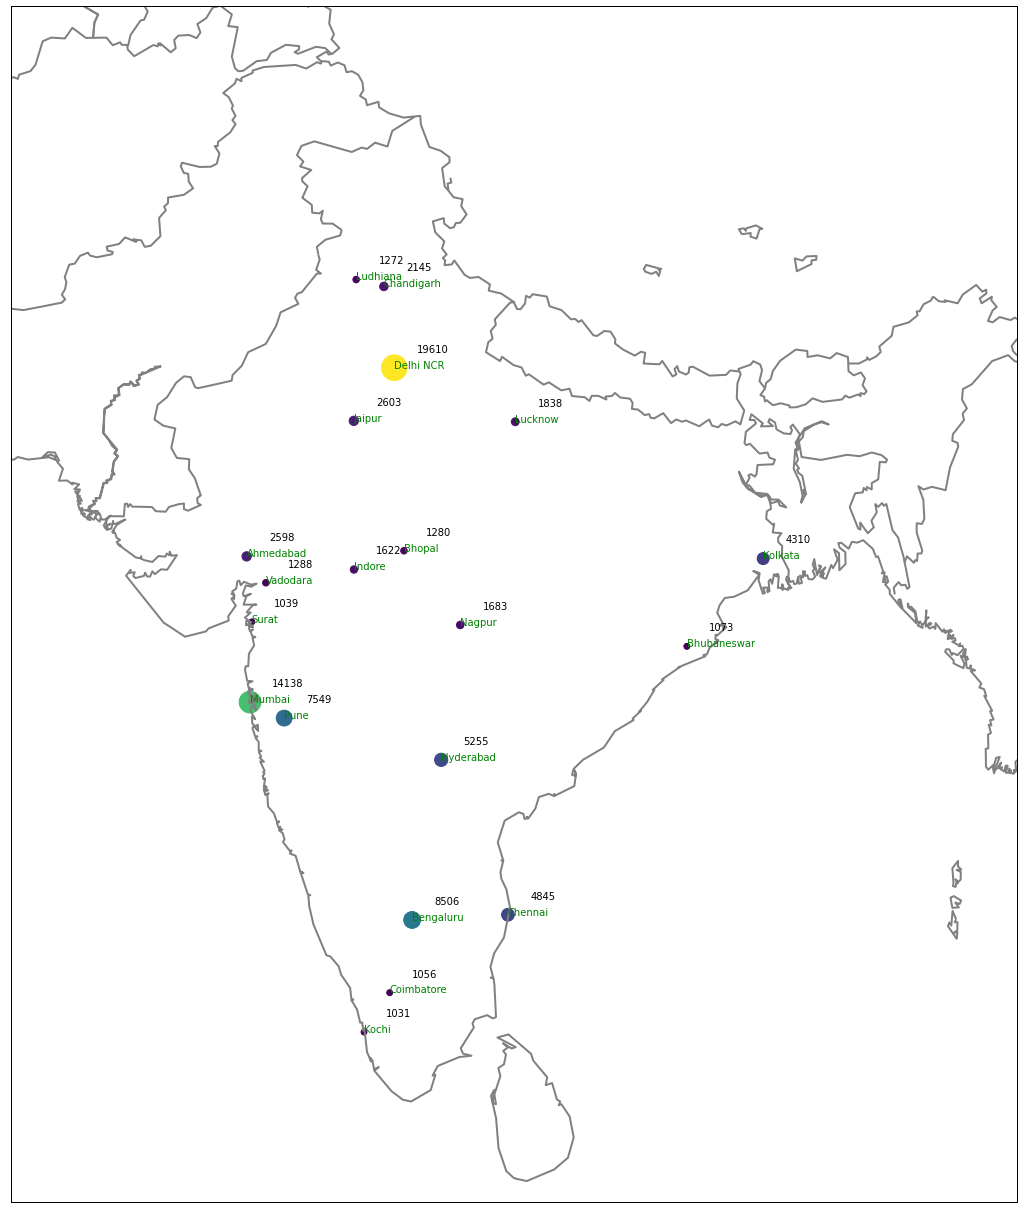

In [46]:

from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,22))
map=Basemap(width=120000,height=900000,projection="lcc",resolution="l",llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
map.drawcountries(linewidth=2,color='gray')
map.drawmapboundary()

map.drawcoastlines(linewidth=2,color='gray')

lng=np.array(topdf["LONG"])
lat=np.array(topdf["LAT"])
city_name=np.array(topdf["CITY"])
citycount=np.array(topdf["COUNTS"])

size=topdf["COUNTS"].apply(lambda x:int(x)/30)
x,y=map(lng,lat)
plt.scatter(x,y,marker="o",c=size,s=size)

for a,b,c,d in zip(x,y,city,citycount):
   plt.text(a,b,c,color='g',fontsize=10)
   plt.text(a+70000,b+50000,str(d),color='black',fontsize=10)

In [29]:
for a,b,c,d in zip(x,y,city,citycount):
   plt.text(a,b,c,color='r',fontsize=10)

1110618.693386267 535069.6925762284 Kochi 1031
758025.5151062771 1824551.4299914418 Surat 1039
1191345.7217827647 659029.5759237821 Coimbatore 1056
2125514.188516113 1747667.0867424007 Bhubaneswar 1073
1085875.3404537519 2900555.292459393 Ludhiana 1272
1236198.9917869659 2048067.2773045758 Bhopal 1280
802190.2292751913 1947420.1492277863 Vadodara 1288
1079007.982179773 1989080.6646850165 Indore 1622
1413006.9835906175 1814787.4665978728 Nagpur 1683
1585971.5625383072 2453518.9265915556 Lucknow 1838
1173054.9612634266 2878951.1237852243 Chandigarh 2145
741621.0053697863 2030393.437904613 Ahmedabad 2598
1078597.23174502 2456476.020487386 Jaipur 2603
2365411.7600657074 2023471.4176289616 Kolkata 4310
1563073.006313718 903922.2553489215 Chennai 4845
1353225.158225336 1390819.685107316 Hyderabad 5255
859500.313377799 1522055.8764464646 Pune 7549
1261814.2362664721 887524.2811875022 Bengaluru 8506
752256.1282537286 1572293.169658684 Mumbai 14138
1205783.477290033 2623369.9159600963 Delhi NCR

In [25]:
city

array(['Kochi', 'Surat', 'Coimbatore', 'Bhubaneswar', 'Ludhiana',
       'Bhopal', 'Vadodara', 'Indore', 'Nagpur', 'Lucknow', 'Chandigarh',
       'Ahmedabad', 'Jaipur', 'Kolkata', 'Chennai', 'Hyderabad', 'Pune',
       'Bengaluru', 'Mumbai', 'Delhi NCR'], dtype=object)